<a href="https://colab.research.google.com/github/romGki/Time-Series-Project/blob/main/Gkirkizas_Romanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring a "Daily Climate Time Series" dataset

Στην παρούσα εργασία πραγματευόμαστε ένα πρόβλημα πρόβλεψης καιρού (weather forecasting) και συγκεκριμένα αποτελεί πρόβλημα χρονοσειρών ("time series"), οι οποίες αφορούν τον καιρό στο Νέο Δελχί της Ινδίας, από την 1η Γενάρη του 2013 έως τις 24 Απρίλη του 2017. Το ζητούμενο είναι να προβλέψουμε την τιμή της μέσης θερμοκρασίας της επόμενης μέρας, με βάση τις τιμές των χαρακτηριστικών των προγούμενων ημερών.

Το σύνολο δεδομένων που εξετάζουμε περιέχει 4 χαρακτηριστικά, καθώς και την ημερομηνία καταγραφής της εκάστοτε μέτρησης ("date"-->YYYY-MM-DD). Τα 4 χαρακτηριστικά είναι τα εξής:
1. meantemp: η μέση θερμοκρασία που κατεγράφη την εκάστοτε μέρα (3-ώρες μετρήσεις ανά ορισμένα χρονικά διαστήματα)
2. humidity: η καταγεγραμμένη τιμή της υγρασίας μέσα στην εκάστοτε μέρα (η ποσότητα υγρασίας ανά ένα συγκεκριμένο όγκο αέρα)
3. wind_speed: η καταγεγραμμένη τιμή της ταχύτητας του αέρα σε kmph (μονάδα μέτρησης της ταχύτητας)
4. meanpressure: η καταγεγραμμένη τιμή πίεση σε atm (μονάδα μέτρησης της πίεσης)

## Data Exploration/ Data Visualization

Σε αυτή την παράγραφο θα εντρυφήσουμε στο σύνολο δεδομένων με στόχο να το κατανοήσουμε, να το περιγράψουμε και να το οπτικοποιήσουμε. Εκτός αυτών, θα πραγματοποιήσουμε κάποιες καίριες αλλαγές στο dataset (Data Preprocessing) για να είναι ευκολότερη και ορθότερη η αξιοποίησή του.

Αρχικά, φορτώνουμε χρήσιμες βιβλιοθήκες και εργαλεία.

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Στη συνέχεια, φορτώνουμε τα δεδομένα μας από το αρχείο "DailyDelhiClimateTrain.csv" που περιέχει τα δεδομένα train και από το αρχείο "DailyDelhiClimateTest.csv" τα δεδομένα test και τα εκτυπώνουμε για να δούμε τη μορφή τους.

In [ ]:
#Αποθηκεύουμε τα μονοπάτια των αρχείων στις αντίστοιχες μεταβλητές
csv_path =  os.path.join(".", "DailyDelhiClimateTrain.csv")
csv_path_test =  os.path.join(".", "DailyDelhiClimateTest.csv")

#Διαβάζουμε από τα μονοπάτια τα αρχεία
data = pd.read_csv(csv_path)
data_test = pd.read_csv(csv_path_test)

#Δημιουργούμε Dataframes από τα 2 dataset
df = pd.DataFrame(data)
df_ts = pd.DataFrame(data_test)

#Εκτυπώνουμε το training και το testing dataset
print(df, "\n\n", df_ts)

            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns] 

            date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.000000
1    2017-01-02  18.500000  77.222222    2.894444   

Το σύνολο εκπαίδευσης αποτελείται από τις μετρήσεις μεταξύ 1/1/2013 έως και 1/1/2017.
Το σύνολο ελέγχου αποτελείται από μετρήσεις μεταξύ 1/1/2017 και 24/4/2017.
Αν παρατηρήσουμε τους παραπάνω πίνακες, βλέπουμε την ποσότητα των εγγραφών στο σύνολο εκπαίδευσης με 1462 μέρες και τις 4 (+1 την ημερομηνία καταγραφής) μεταβλητές, ενώ το σύνολο ελέγχου αποτελέιται από 114 μέρες. Η κοινή μέρα, 1/1/2017, αποτελεί πρόβλημα καθώς έχει και διαφορετικές μέτρησεις. Επιλέγω να διατηρήσω την 1/1/2017 από το test set, αλλά οι παράμετροι θα αποτελούνται από τις μέσες τιμές των 2 overlapping εγγραφών. Η εγγραφή 1/1/2017 θα διαγραφεί από το σύνολο εκπαίδευσης. Επιπλέον, ορίζουμε το χαρακτηριστικό "date" ως τον δείκτη για τα Dataframes χρησιμοποιώντας τη συνάρτηση set_index() των pandas.

In [ ]:
#Ορίζουμε τη στήλη "date" ως δείκτη
data = df.set_index("date", drop=True)
data_test = df_ts.set_index("date", drop=True)

#Αποθηκεύουμε τις overlapping εγγραφές των 2 dataset
train_overlapping_value = data.loc['2017-01-01']
test_overlapping_value = data_test.loc['2017-01-01']

#Υπολογίζουμε τη μέση τιμή για κάθε χαρακτηριστικό
avg_overlapping_value = (train_overlapping_value + test_overlapping_value) / 2

#Ανανεώνουμε την εγγραφή 1/1/2017 του test set με τη μέση τιμή
data_test.loc['2017-01-01'] = avg_overlapping_value

#Εκτυπώνουμε τη νέα τιμή της εγγραφής
print("Η ανανεωμένη τιμή για 1/1/2017 του test set:")
print(data_test.loc['2017-01-01'])

#Διαγράφουμε την εγγραφή 1/1/2017 από το train set
data = data.drop(labels='2017-01-01', axis='index')
print("\nΤελευταίες εγγραφές του train set μετά τη διαγραφή:")
print(data.tail())

#Εκτυπώνουμε μία τυχαία εγγραφή από τα 2 datasets μετά τις παραπάνω τροποποιήσεις για έλεγχο
print("\nΤυχαία εγγραφή από το train set:")
print(data.sample())
print("\nΤυχαία εγγραφή από το test set:")
print(data_test.sample())

Η ανανεωμένη τιμή για 1/1/2017 του test set:
meantemp         12.956522
humidity         92.934783
wind_speed        1.371739
meanpressure    537.500000
Name: 2017-01-01, dtype: float64

Τελευταίες εγγραφές του train set μετά τη διαγραφή:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-12-27  16.850000  67.550000    8.335000   1017.200000
2016-12-28  17.217391  68.043478    3.547826   1015.565217
2016-12-29  15.238095  87.857143    6.000000   1016.904762
2016-12-30  14.095238  89.666667    6.266667   1017.904762
2016-12-31  15.052632  87.000000    7.325000   1016.100000

Τυχαία εγγραφή από το train set:
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2015-10-29    22.125      63.5        1.85      1016.875

Τυχαία εγγραφή από το test set:
            meantemp  humidity  wind_speed  meanpressure
date                                                 

Οι αλλαγές μας ήταν πετυχημένες.
Τώρα, εκτυπώνουμε μέσω της συνάρτησης describe() κάποια στοιχεία των 2 dataset, όπως ο μέσος, ο διάμεσος, η μέγιστη, η ελάχιστη τιμή κτλ των χαρακτηριστικών.

In [ ]:
print("Train data:\n", data.describe(), "\n\nTest data:\n", data_test.describe())

Train data:
           meantemp     humidity   wind_speed  meanpressure
count  1461.000000  1461.000000  1461.000000   1461.000000
mean     25.506127    60.744851     6.806865   1011.101197
std       7.339416    16.743928     4.559688    180.293335
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.571429
50%      27.714286    62.625000     6.250000   1008.555556
75%      31.312500    72.125000     9.250000   1014.937500
max      38.714286    98.000000    42.220000   7679.333333 

Test data:
          meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.687145   56.320337    8.131891   1008.232458
std      6.389890   19.176352    3.608562     44.840094
min     11.000000   17.750000    1.371739    537.500000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.7

Παρακάτω, εκτυπώνουμε μέσω της συνάρτησης info() κάποιες περαιτέρω πληροφορίες για τα δεδομένα μας.

In [ ]:
print(data.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2013-01-01 to 2016-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1461 non-null   float64
 1   humidity      1461 non-null   float64
 2   wind_speed    1461 non-null   float64
 3   meanpressure  1461 non-null   float64
dtypes: float64(4)
memory usage: 51.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 6.1+ KB
None


Ωραία! Παρατηρούμε ότι όλα τα χαρακτηριστικά μας είναι τύπου float και ότι δεν υπάρχει κανένα missing value.

Στη συνέχεια, θα χωρίσουμε το train set σε train set και validation set για την επαλήθευση της διαδικασίας εκπαίδευσης και προκειμένου να αποφύγουμε προβλήματα όπως το overfitting.

In [ ]:
#Ορίζουμε το μέγεθος του validation set
val_length = int(data.shape[0]*0.1)

#ΧΧωρίζουμε το σύνολο εκπαίδευσης και δημιουργούμε με το τελευταίο 20% αυτού το validation set
data_val = data[-val_length:]
data_train = data[: -val_length]

#Εκτυπώνουμε τις 3 πρώτες και τις 3 τελευταίες εγγραφές του κάθε σετ δεδομένων
print("Training data:\n", data_train.head(3), "\n", data_train.tail(3))
print("\nValidation data:\n", data_val.head(3), "\n", data_val.tail(3))
print("\nTest data:\n", data_test.head(3), "\n", data_test.tail(3))

Training data:
              meantemp  humidity  wind_speed  meanpressure
date                                                     
2013-01-01  10.000000      84.5    0.000000   1015.666667
2013-01-02   7.400000      92.0    2.980000   1017.800000
2013-01-03   7.166667      87.0    4.633333   1018.666667 
              meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-08-05  33.800000  61.666667    4.320000    999.333333
2016-08-06  30.066667  76.000000    6.926667   1000.800000
2016-08-07  33.117647  65.176471    7.852941   1000.529412

Validation data:
              meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-08-08  33.809524  62.380952    9.440909    999.636364
2016-08-09  31.615385  71.653846    9.550000    998.500000
2016-08-10  32.000000  71.259259   10.159259    999.370370 
              meantemp   humidity  wind_speed  meanpressure
date                  

Τώρα, δημιουργούμε 4 γραφήματα, 1 για κάθε στήλη των δεδομένων μας σε σχέση με τον χρόνο.

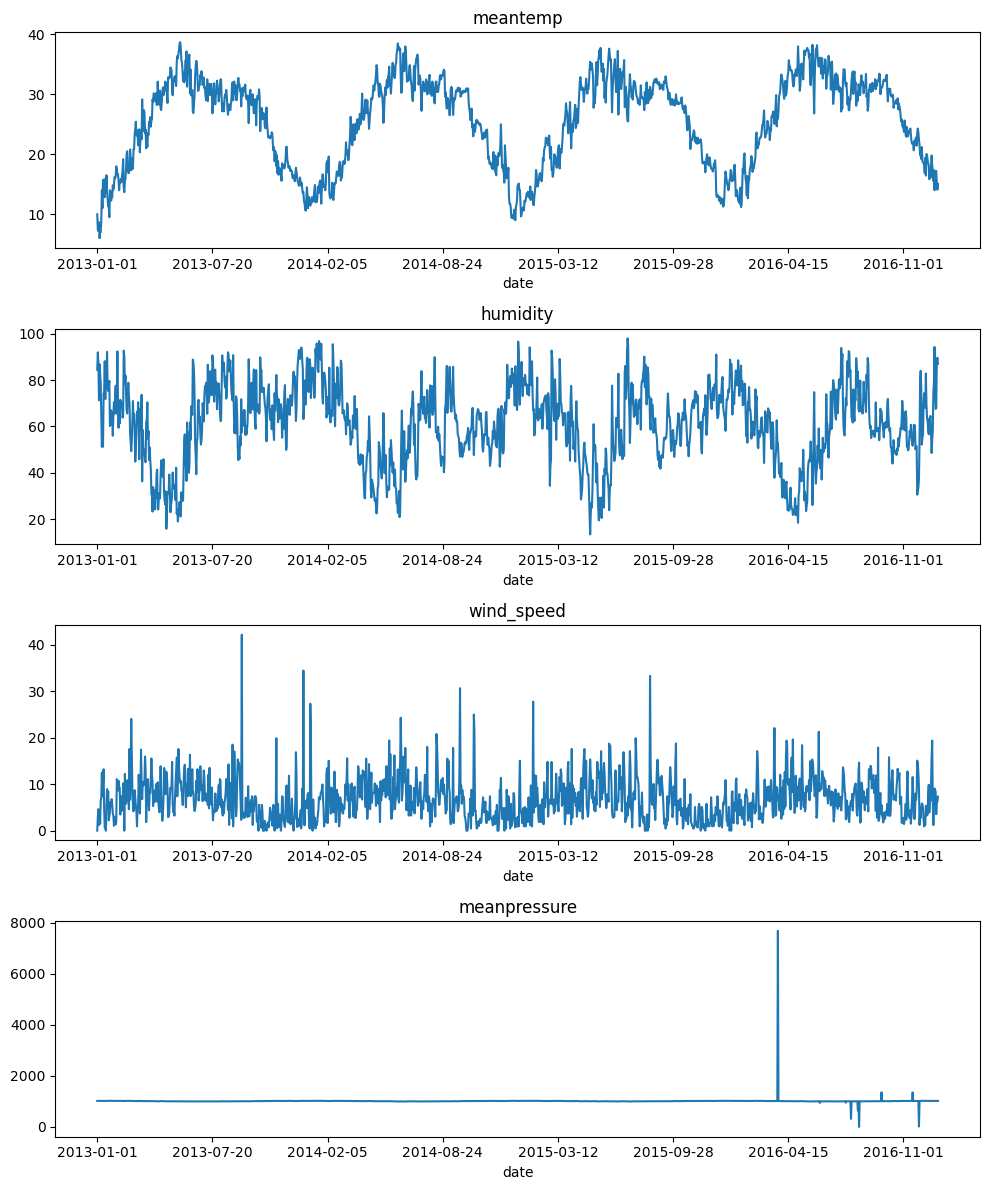

In [ ]:
#Αποθηκεύουμε σε μία λίστα τα 4 χαρακτηριστικά μας.
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

#Ορίζουμε τα subplots και το μέγεθός τους
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

#Δημιουργούμε βρόγχο μέσω όλων των στηλών των δεδομένων
for i, col in enumerate(columns):
    #Δημιουργούμε τα επιμέρους plots
    data[col].plot(ax=axes[i], title=col)

#Εκτυπώνουμε τα subplots
plt.tight_layout()
plt.show()

Σε αυτό το σημείο θα εξετάσουμε τα δεδομένα μας άποκλειστικά για την κάθε χρονιά ξεχωριστά, προκειμένου να πάρουμε μία καθαρότερη εικόνα για αυτά και να εξάγουμε περαιτέρω συμπεράσματα.

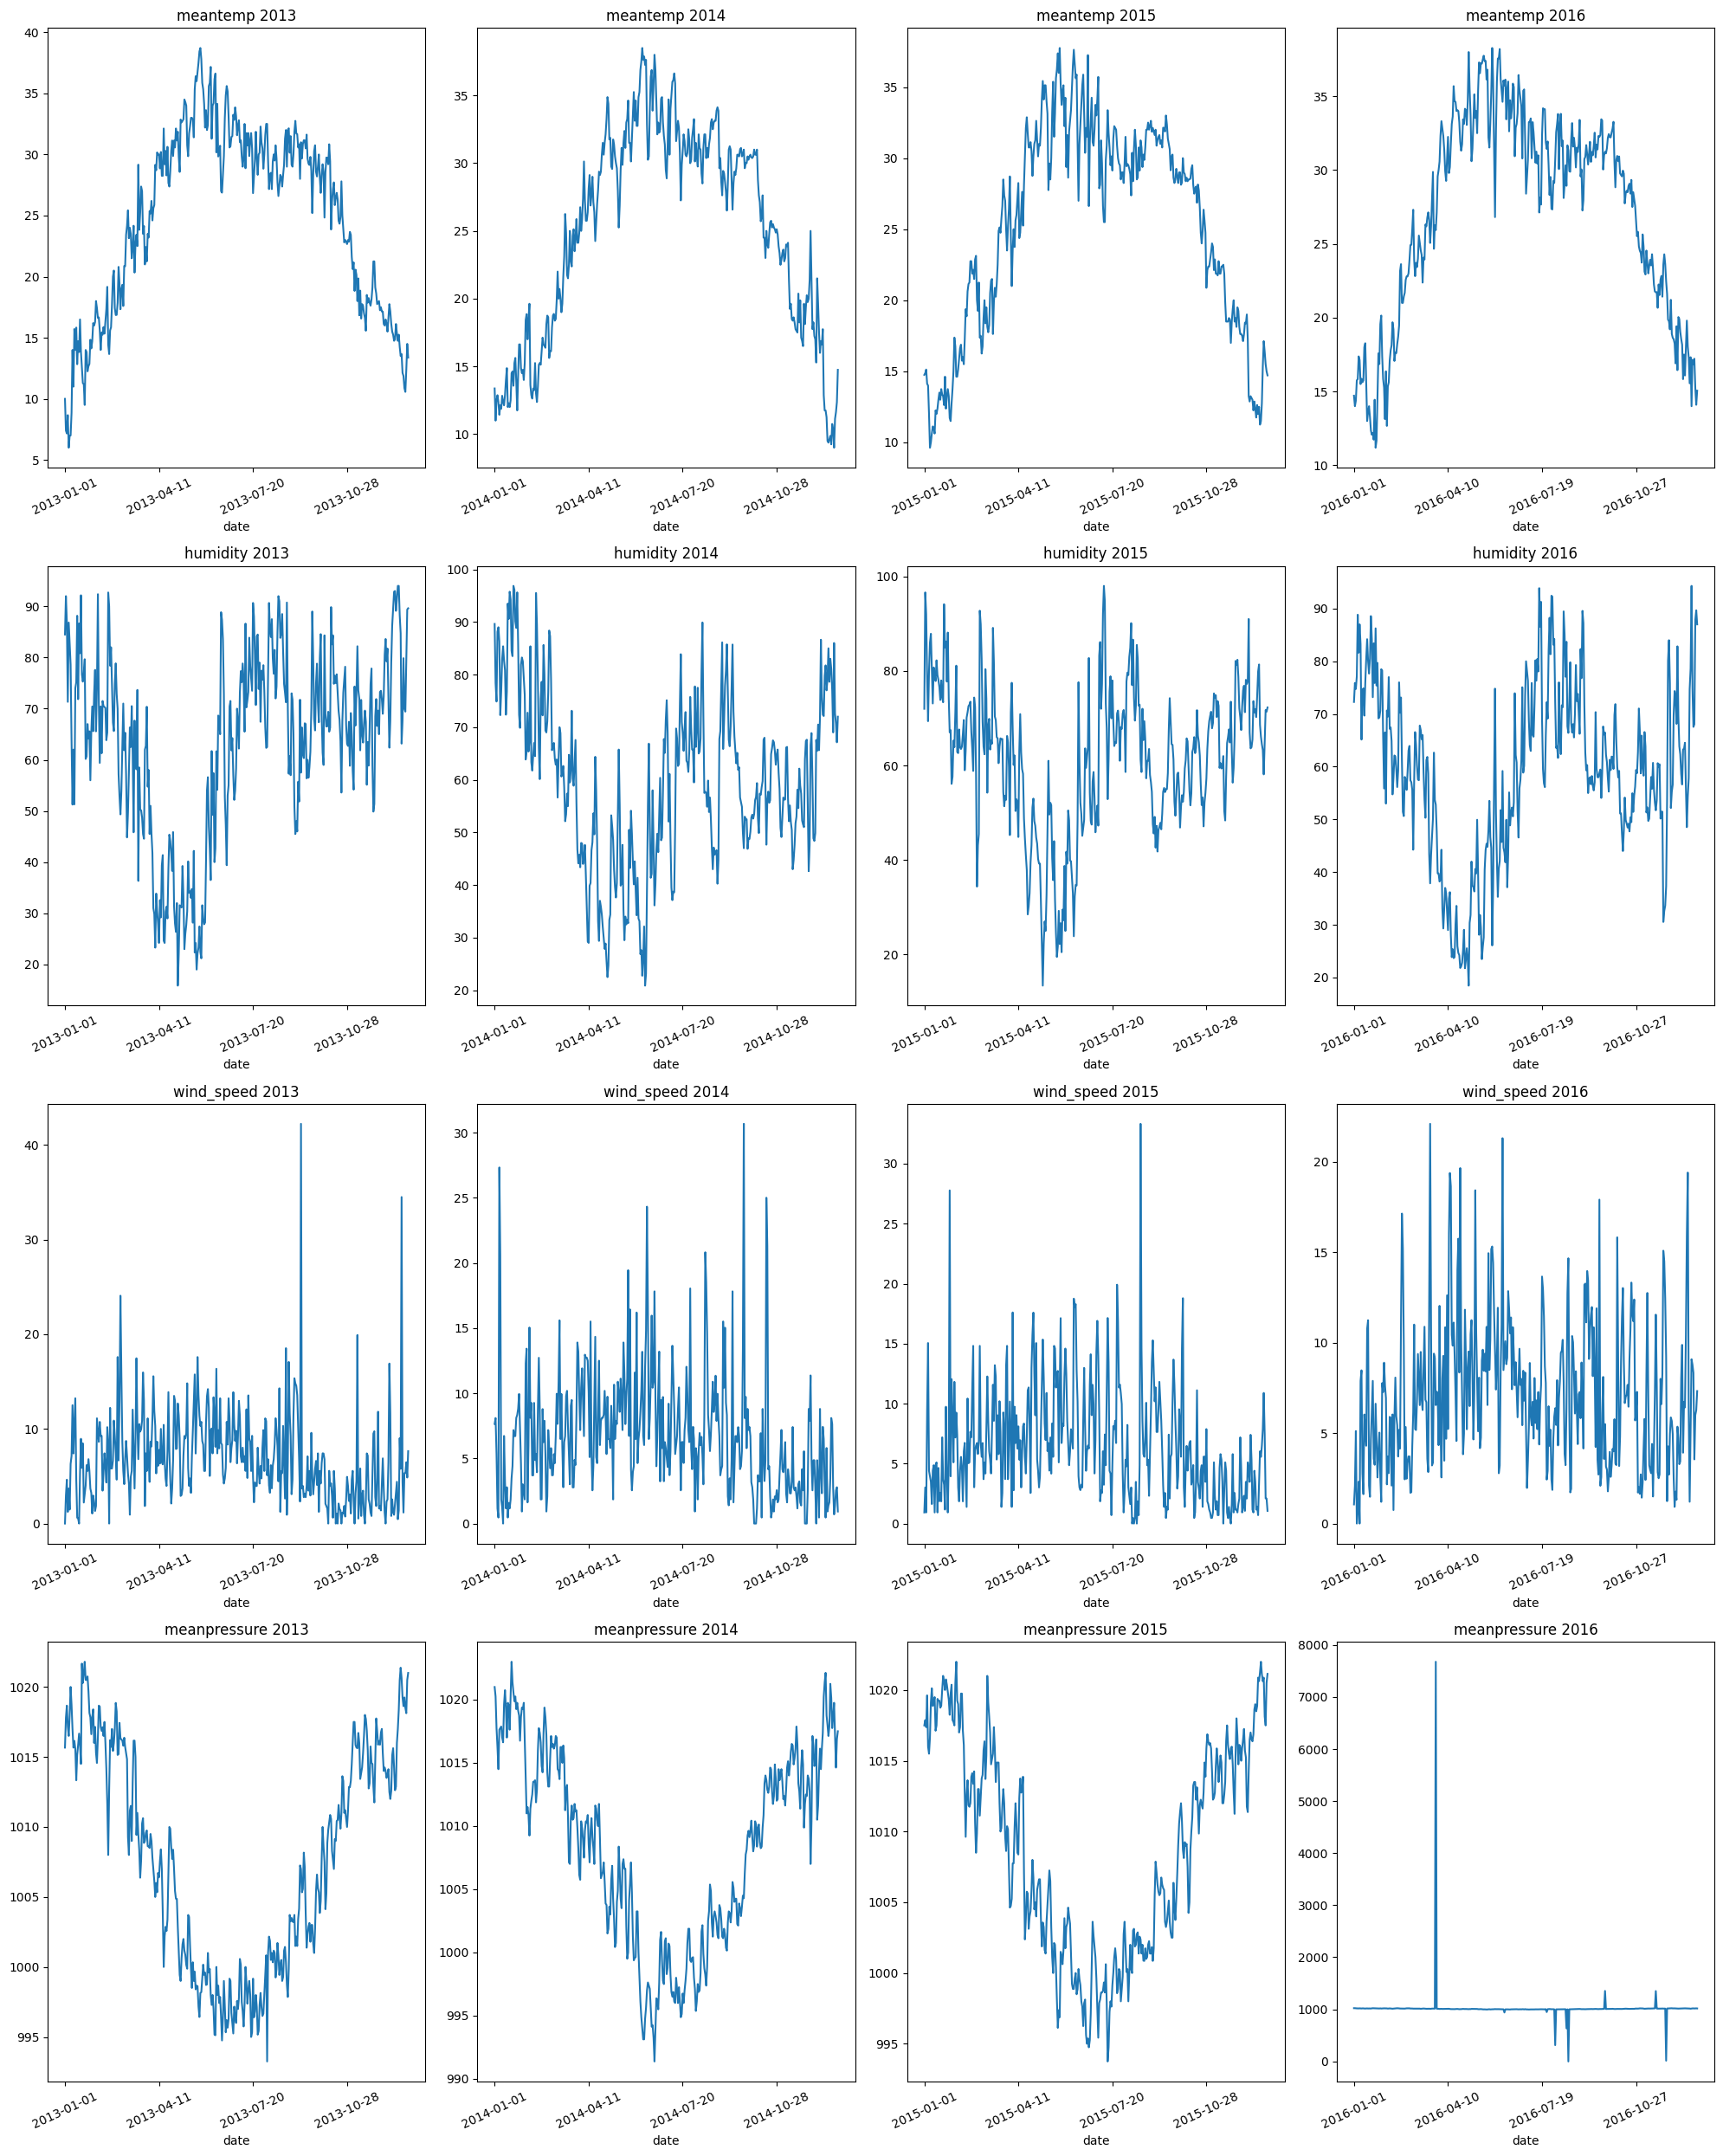

In [ ]:
#Δημιουργούμε τις παρακάτω 4 μεταβλητές που αποθηκεύουν τα δεδομένα της αντίστοιχης χρονικής περιόδου
dt13 = data.loc['2013-01-01': '2014-01-01']      #2013-2014
dt14 = data.loc['2014-01-01': '2015-01-01']     #2014-2015
dt15 = data.loc['2015-01-01': '2016-01-01']     #2015-2016
dt16 = data.loc['2016-01-01': '2017-01-01']     #2016-2017

#Ορίζουμε τα subplots και το μέγεθός τους
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 25))

#Δημιουργούμε βρόγχο μέσω όλων των στηλών των δεδομένων
for i, col in enumerate(columns):
    #Δημιουργούμε τα επιμέρους plots για την κάθε χρονιά
    dt13[col].plot(ax=axes[i, 0], title=f'{col} {2013}', rot=25 )
    dt14[col].plot(ax=axes[i, 1], title=f'{col} {2014}', rot=25 )
    dt15[col].plot(ax=axes[i, 2], title=f'{col} {2015}', rot=25 )
    dt16[col].plot(ax=axes[i, 3], title=f'{col} {2016}', rot=25 )

#Εκτυπώνουμε τα subplots
plt.tight_layout()
plt.show()

Έπειτα, παρατηρούμε κάποια σημεία στα γραφήματα τα οποία απέχουν κατά πολύ των υπόλοιπων, της μέσης τιμής και δεν τηρούν τις τάσεις, τα οποία ονομάζουμε outliers. Λόγοι ύπαρξης αυτών είναι λάθη κατά τη μέτρηση, ακραία αλλά σπάνια γεγονότα, λάθος κατά τη συγγραφή του dataset κλπ. Αυτά τα σημεία/εγγραφές χρειάζεται να μελετηθούν και πιθανόν να αντικατασταθούν οι τιμές τους με κατάλληλους τρόπους.

Outliers in meantemp:
Series([], Name: meantemp, dtype: float64)
Outliers in humidity:
Series([], Name: humidity, dtype: float64)
Outliers in wind_speed:
date
2013-03-01    24.066667
2013-09-09    42.220000
2013-12-25    34.487500
2014-01-06    27.337500
2014-01-07    20.600000
2014-06-12    24.325000
2014-08-13    20.825000
2014-09-23    30.685714
2014-10-17    25.012500
2014-10-18    21.300000
2015-01-28    27.775000
2015-08-19    33.325000
2016-03-22    22.100000
2016-06-07    21.306250
Name: wind_speed, dtype: float64
Outliers in meanpressure:
date
2016-03-28    7679.333333
2016-08-02     310.437500
2016-08-16      -3.041667
2016-11-28      12.045455
Name: meanpressure, dtype: float64


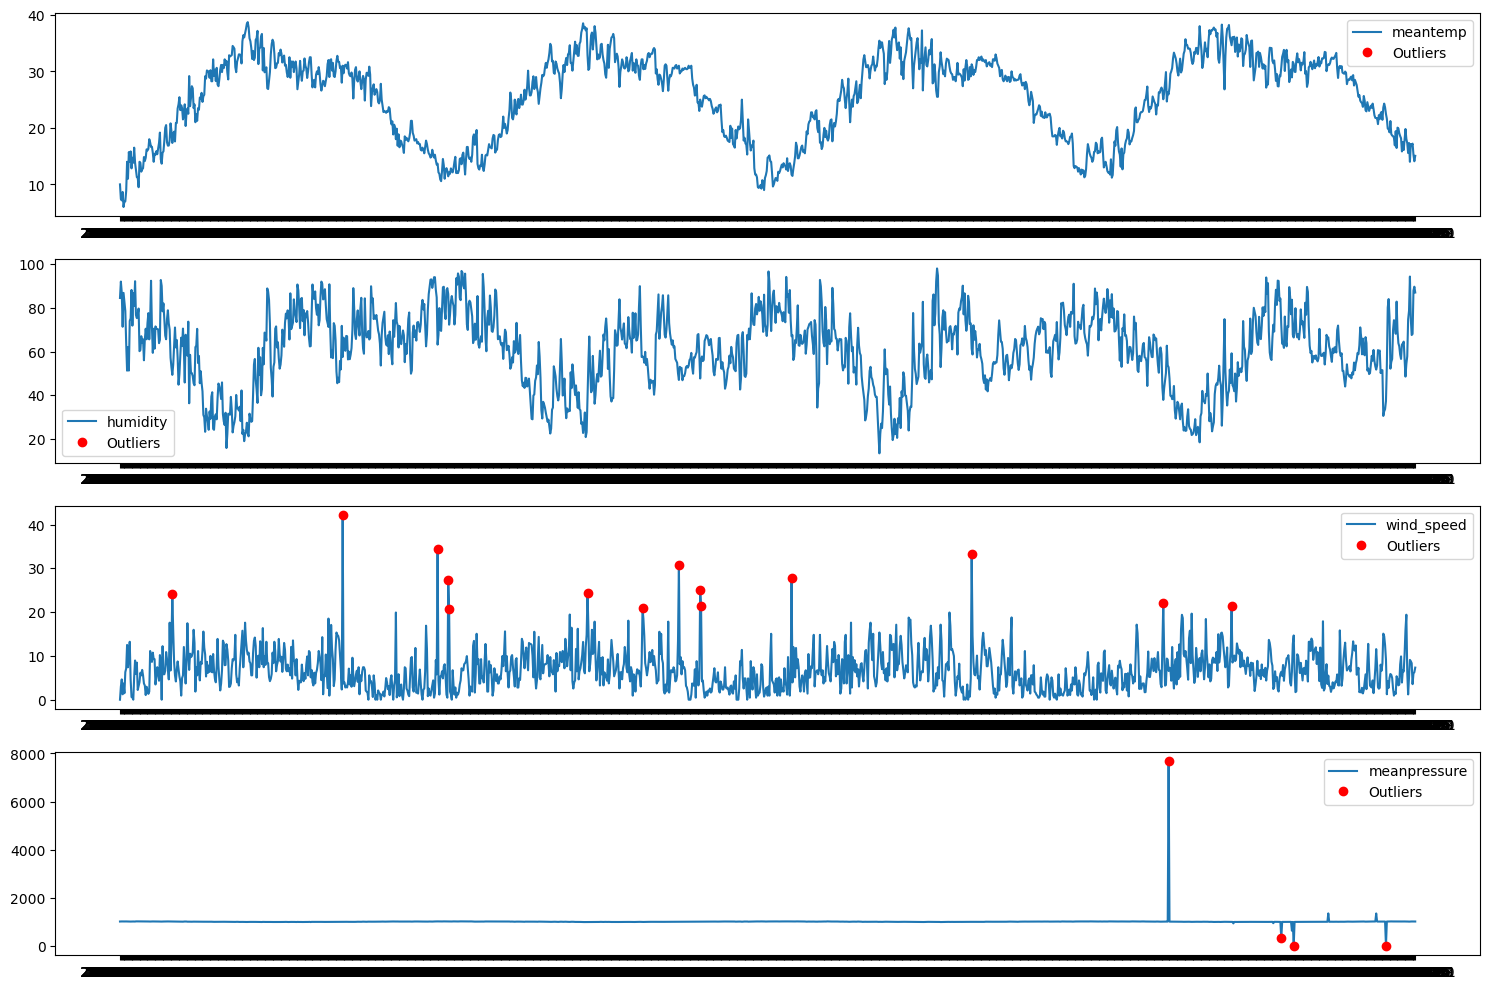

In [ ]:
#Υπολογίζουμε το z score με το οποίο θα βρούμε τα outliers στα δεδομένα μας
z_scores = zscore(data)
#Εάν μία εγγραφή έχει z score > 3 ή < -3 τότε αποτελεί outlier
outliers = (z_scores > 3) | (z_scores < -3)

#Εκτυπώνουμε τα outliers
for col in data.columns:
    outlier_data = data[col][outliers[col]]
    print(f"Outliers in {col}:")
    print(outlier_data)

#Δημιουργούμε plots των δεδομένων στα οποία σημειώνονται τα outlier σημεία
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 1, i + 1)
    plt.plot(data.index, data[col], label=col)
    plt.plot(data.index[outliers[col]], data[col][outliers[col]], 'ro', label='Outliers')
    plt.legend()

plt.tight_layout()
plt.show()

Στη συνέχεια της μελέτης του συνόλου δεδομένων μας δημιουργούμε ένα γράφημα συσχέτισης των 4 παραμέτρων, το οποίο μας φανερώνει τις περιπτώσεις συσχέτισης (αρνητικής ή θετικής) μεταξύ των μεταβλητών.*********

<AxesSubplot:>

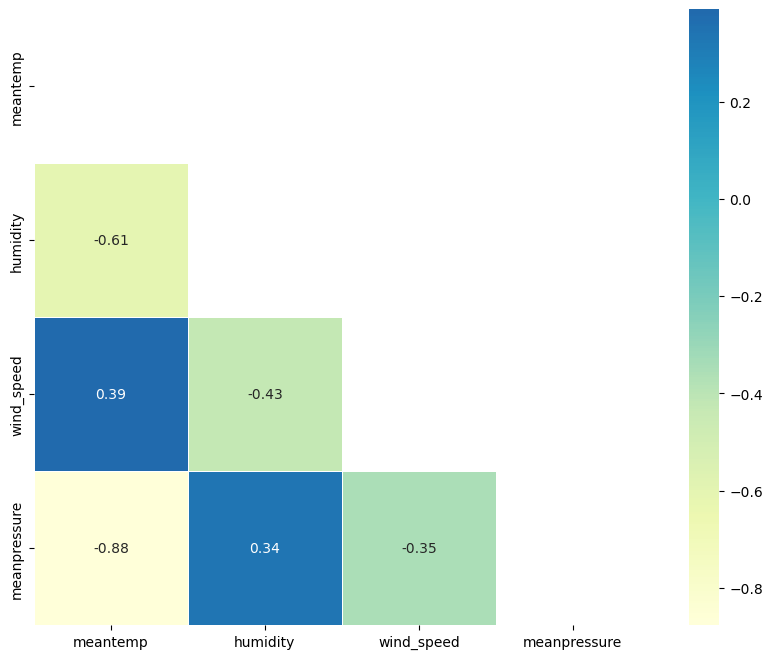

In [ ]:
#Δοκιμάζουμε τη μέθοδο Spearman για να δούμε τη συσχέτιση των δεδομένων εκπαίδευσης
corr = data_train.corr(method='spearman')

#Δημιουργούμε μια μάσκα που μηδενίζει από την κύρια διαγώνιο και πάνω
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

#Ορίζουμε το plot και τις διαστάσεις του
f, ax = plt.subplots(figsize=(10, 8))

#Σχεδιάζουμε το heatmap με τη μάσκα χρησιμοποιώντας τη seaborn βιβλιοθήκη
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5)

Παρατηρούμε ότι υπάρχει μια περιοδικότητα όσον αφορά τις 3 από τις 4 παραμέτρους, εκτός της ταχύτητας του ανέμου. Συγκεκριμένα, από τα γραφήματα μπορούμε να διαπιστώσουμε την ανοδικότητα της μέσης θερμοκρασίας από περίπου τον Φλεβάρη μέχρι περίπου τον Ιούνιο κάθε χρονιάς, ενώ υπάρχει μια αντίστροφη εξέλιξη από τον Ιουλιο έως τον Ιανουάριο του επόμενου έτους, διάστημα κατά το οποίο η θερμοκρασία έχει πτωτική τάση. Αντιθέτως, όσον αφορά την υγρασία και τη μέση πίεση του αέρα παρατηρούμε ότι υπάρχει μία ανάστροφη της μέσης θερμοκρασίας περιοδικότητα. Δηλαδή, οι τιμές των 2 αυτών παραμέτρων αυξάνονται περίπου στα διαστήματ μεταξύ

Τώρα, θα πραγματοποιήσουμε κανονικοποίηση των τιμών των χαρακτηριστικών όλων των συνόλων δεδομένων, προκειμένου να τα φέρουμε στο ίδιο εύρος τιμών. Η κανονικοποίηση έχει πολλά χρήσιμα οφέλη, όπως η θετική επίδραση στη σύγκλιση των μοντέλων πρόβλεψης ή η μείωση της επιρροής των αποστάσεων των διανυσμάτων ενός συνόλου δεδομένων.

Χρησιμοποιώντας συναρτήσεις της scikit-learn πραγματοποιούμε την κανονικοποίηση/τυποποίηση των δεδομένων.Η τεχνική Min-Max normalization που χρησιμοποιούμε προσαρμόζει τα δεδομένα σε ένα συγκεκριμένο εύρος, από 0 έως 1

In [ ]:
#Min-Max Normalization
#Δημιουργούμε ένα αντικείμενο κανονικοποίησης
scaler = sklearn.preprocessing.MinMaxScaler()

#Προσαρμόζουμε τον scaler στα δεδομένα εκπαίδευσης
scaler.fit(data_train)

#Κανονικοποιούμε τα 3 σύνολα δεδομένων
data_train_scaled = scaler.transform(data_train)
data_val_scaled = scaler.transform(data_val)
data_test_scaled = scaler.transform(data_test)

#Έλεγχος της κανονικοποίησης
print("Train set - Min values:", np.min(data_train_scaled, axis=0))
print("Train set - Max values:", np.max(data_train_scaled, axis=0))
print("Validation set - Min values:", np.min(data_val_scaled, axis=0))
print("Validation set - Max values:", np.max(data_val_scaled, axis=0))
print("Test set - Min values:", np.min(data_test_scaled, axis=0))
print("Test set - Max values:", np.max(data_test_scaled, axis=0))

Train set - Min values: [0. 0. 0. 0.]
Train set - Max values: [1. 1. 1. 1.]
Validation set - Min values: [ 0.24454148  0.20244932  0.02190905 -0.04254086]
Validation set - Max values: [0.85007278 0.95625    0.45961066 0.14142931]
Test set - Min values: [0.15283843 0.05109797 0.03249027 0.03081364]
Test set - Max values: [0.87117904 0.97438063 0.45746769 0.09667283]


Τέλος, λόγω του γεγονότος ότι διαχειριζόμαστε ένα πρόβλημα χρονοσειρών, πρέπει να ορίσουμε το πλήθος των εγγραφών-ημερών που θα λειτουργούν σαν προβλεπτικές τιμές για την επόμενη μέρα. Έτσι, ορίζουμε το ολισθαίνον παράθυρο για κάθε ένα από τα υποσύνολα δεδομένων μας.